'Unsupervised Matching: headphones_headphones_catalog'

Stats about pool data
Rescale values
Nan values in input labelled data:  0
Replace all Nan values with -1
Profiling Density


{'<http://schema.org/Product/brand>': '0.913',
 '<http://schema.org/Product/color>': '0.269',
 '<http://schema.org/Product/connectivity': '0.384',
 '<http://schema.org/Product/frequency': '0.202',
 '<http://schema.org/Product/headphones': '0.555',
 '<http://schema.org/Product/impedance>': '0.445',
 '<http://schema.org/Product/included': '0.110',
 '<http://schema.org/Product/model>': '0.658',
 '<http://schema.org/Product/mpn>': '0.355',
 '<http://schema.org/Product/product': '0.269',
 '<http://schema.org/Product/sensitivity>': '0.310',
 '<http://schema.org/Product/warranty>': '0.117',
 '<http://schema.org/Product/weight>': '0.182',
 'cosine': '1.000'}

Stats about validation data
Rescale values
Nan values in input labelled data:  0
Replace all Nan values with -1


'Training size:'

1163

'Validation size:'

290

<span style='color:blue;font-size:160%'><b> Get bootstrapped pairs using feature value pairwise similarity *all* weighted by the feature density (*0.5) and cosine with tfidf (*0.5). </b></span>

Knee of the curve is at index = 937
Knee value = 0.3399855413747971


'Define Elbow threshold: 0.339986 '

Consider everything above the threshold as positive and below as negative.
Class distribution in sample:


{0: 937, 1: 226}

'Training size:'

1163

'Validation size:'

290

Method attrelbow_density gives 0.634921 prec, 0.888889 recall and 0.740741 f1 if noisy data are used to train a RF


<span style='color:blue;font-size:160%'><b> Get bootstrapped pairs using feature value pairwise similarity *all* weighted by the feature density (*0.5) and cosine with tfidf (*0.5). </b></span>

'Define static threshold (0.5) and take positive and negative elements'

Threshold defined with static method threshold (0.5): 0.501504
Consider everything above the threshold as positive and below as negative.
Class distribution in sample:


{0: 1083, 1: 80}

'Training size:'

1163

'Validation size:'

290

Method attrstatic_density gives 0.937500 prec, 0.333333 recall and 0.491803 f1 if noisy data are used to train a RF


<span style='color:blue;font-size:160%'><b> Get bootstrapped pairs using feature value pairwise similarity *all* weighted by the feature density (*0.5) and cosine with tfidf (*0.5). </b></span>

Find Otsu's threshold: |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% Complete
Threshold defined with Otsu's method: 0.314259 


"Define Otsu's threshold: 0.314259"

Consider everything above the threshold as positive and below as negative.
Class distribution in sample:


{0: 892, 1: 271}

'Training size:'

1163

'Validation size:'

290

Method attrotsu_density gives 0.555556 prec, 1.000000 recall and 0.714286 f1 if noisy data are used to train a RF


<span style='color:blue;font-size:160%'><b> Get bootstrapped pairs using feature value pairwise similarity *all* weighted by the feature density (*0.5) and cosine with tfidf (*0.5). </b></span>

Find Valley threshold: |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% Complete
Threshold defined with valley threshold method: 0.302535 


'Define Valley threshold: 0.302535'

Consider everything above the threshold as positive and below as negative.
Class distribution in sample:


{0: 877, 1: 286}

'Training size:'

1163

'Validation size:'

290

Method attrvalley_density gives 0.536585 prec, 0.977778 recall and 0.692913 f1 if noisy data are used to train a RF


,Dataset,Bootstrap sample correctness,Bootstrap sample f1,Method,Precision,Recall,F1- Random Forest
0,headphones_headphones_catalog,-,-,Passive Supervised Learning,0.977,0.956,0.966
1,headphones_headphones_catalog,0.905417,0.729064,attrelbow_density,0.635,0.889,0.741
2,headphones_headphones_catalog,0.901978,0.561538,attrstatic_density,0.938,0.333,0.492
3,headphones_headphones_catalog,0.877042,0.682927,attrotsu_density,0.556,1.000,0.714
4,headphones_headphones_catalog,0.869304,0.67382,attrvalley_density,0.537,0.978,0.693


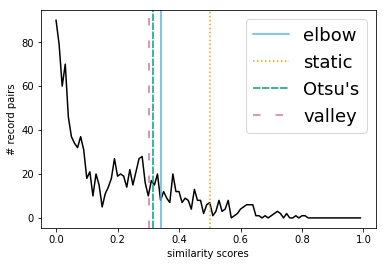

In [15]:
%matplotlib inline
from datautils import*
from IPython.display import Markdown, display
import numpy as np
from preprocessing import*
from learning import*
from bootstrapping import*
from bootstrapping_unsupervised import*
from similarityutils import*
from collections import Counter
import pandas as pd

# run thresholding comparison
thresholding()


In [14]:
#start from here
def thresholding():
   
    #set these parameters   
    bootstrap_methods = ['attrelbow_density','attrstatic_density', 'attrotsu_density','attrvalley_density']
    threshold_labels = ['elbow', 'static', 'Otsu\'s', 'valley']
    #threshold_colors = ['blue', 'green', 'orange', 'magenta']
    threshold_colors = [ '#56B4E9',"#E69F00" ,'#009E73', '#CC79A7']
    threshold_linestyles = [None, 'dotted' , (0, (5, 1)), (0, (5, 10))]
    threshold_text = [50, 100, 150, 200]
    thresholds = []
    model = 'rf'
    dataPathmain = "../datasets/wdc_product"
    domain = 'product'
    datasets = [ 'headphones_headphones_catalog']
        
      
    for dataset in datasets:
        model_ = []
        method_ = []
        precision_=[]
        precision_sigma=[]
        recall_=[]
        recall_sigma=[]
        f1_=[]
        f1_sigma = []
        bootstrap_sample_correctness = []
        bootstrap_sample_f1 = []

        dataset_=[]
        
        #get data and profiling information
        display("Unsupervised Matching: %s" %dataset)
        
        featureFile_train = dataPathmain+'/features_'+dataset+'_train'
        featureFile_test = dataPathmain+'/features_'+dataset+'_test'
        
        print("Stats about pool data")
        trainingData = getLabelledDataFromFile(featureFile_train, rescale=True)
        print("Profiling Density")
        prof_results = dict()
        data_values = trainingData['feature_values']
        tobedropped=[]
        for c in data_values.columns:
            empty_values = len(data_values[data_values[c] == -1])
            per= float(empty_values)/float(len(data_values[c]))
            density = 1-per
           
            #drop non-dense attributes for the wdc datasets
            if 'wdc_product' in domain:
                column_name = c
            else: column_name = c.split("_")[0]
            if (density<0.1):tobedropped.append(c)
            else: prof_results[column_name]= ("%.3f" %density)
        
        if 'wdc_product' in domain:
            print ("Columns to be dropped:", len(tobedropped))
            trainingData['feature_values'] = trainingData['feature_values'].drop(tobedropped, axis=1)
        display(prof_results)
        print("Stats about validation data")
        validationData = getLabelledDataFromFile(featureFile_test, rescale=True)
        if 'wdc_product' in domain:
            validationData['feature_values'] = validationData['feature_values'].drop(tobedropped, axis=1)

        
        X = trainingData['feature_values']
        y = trainingData['labels']
        ids  = trainingData['ids']
        bootstrap_sample_correctness
    
        #get results for supervised matching
        prec, recall, fscore, support = batchTraining(X,y,validationData['feature_values'],validationData['labels'],model, printResults = False,
                                                           optimization=False)
        precision_.append("%.3f" %prec)
        recall_.append("%.3f" %recall)
        f1_.append("%.3f" %fscore)
        model_.append(model)
        
        dataset_.append(dataset)
        method_.append('Passive Supervised Learning')
        bootstrap_sample_correctness.append("-")
        bootstrap_sample_f1.append("-")
        for m in bootstrap_methods:

            bootstrap = BootstrappingUnsupervised(data=X, labels=y, ids=ids, bootstrap_method=m, domain=domain)
            sorted_dataset = bootstrap.sorted_dataset
            thresholds.append(bootstrap.threshold)

            bootstrapping_sample = bootstrap.sample
            bootstrap_sample_correctness.append(bootstrapping_sample['correctness'])
            bootstrap_sample_f1.append(bootstrapping_sample['f1'])

            prec, recall, fscore, support = batchTraining(bootstrapping_sample['data'],bootstrapping_sample['labels'],
                                                          validationData['feature_values'],validationData['labels'],model, printResults = False, optimization=False,
                                                          showMisclassifications = False, ids = ids)

            print("Method %s gives %f prec, %f recall and %f f1 if noisy data are used to train a RF" % (m, prec, recall, fscore))
            
            method_.append(m)
            model_.append(model)
            precision_.append("%.3f" %prec)

            recall_.append("%.3f" %recall)

            f1_.append("%.3f" %fscore)

            dataset_.append(dataset)

        results = list(zip(dataset_ ,bootstrap_sample_correctness, bootstrap_sample_f1,method_,precision_,recall_, f1_))
        df_results = pd.DataFrame(results, columns = ['Dataset',  'Bootstrap sample correctness', 'Bootstrap sample f1','Method', 'Precision', 'Recall','F1- Random Forest']) 
        display(df_results)
        
        simple_hist, _ = np.histogram(sorted_dataset, bins=100, range=(0.0, 1.0))
        fig, ax = plt.subplots()
        ax.plot(np.arange(0.00,1.0,0.01),simple_hist, c='#000000')
        for i in range(len(threshold_colors)):
            ax.axvline(x=thresholds[i], c= threshold_colors[i], linestyle =  threshold_linestyles[i], label=threshold_labels[i])
            #ax.text(thresholds[i],threshold_text[i],threshold_labels[i],rotation=90)
        
        ax.legend(fontsize=18)
        plt.xlabel('similarity scores')
        plt.ylabel('# record pairs')
        plt.savefig('../results/graphs/%s_threshold_comparison.pdf' % dataset, bbox_inches='tight', format='pdf')
        
        